In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np

%matplotlib inline 

base_dir = os.path.expanduser("~")
DATA_DIR = os.path.join(base_dir, 'Desktop', 'photos')

print(f"Шлях до даних: {DATA_DIR}")

# Перевірка: чи існує папка і що в ній є
if os.path.exists(DATA_DIR):
    print("Папка знайдена! Вміст папки:")
    print(os.listdir(DATA_DIR))
else:
    print("ПОМИЛКА: Папка не знайдена.")

Шлях до даних: C:\Users\rusla\Desktop\photos
Папка знайдена! Вміст папки:
['keyboard', 'microphone', 'webcam']


In [9]:
IMG_HEIGHT = 227
IMG_WIDTH = 227
BATCH_SIZE = 16

# Створюємо генератор (нормалізація + поділ на тренування/тест)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

print("Навчальна вибірка:")
train_ds = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

print("Тестова вибіркa:")
val_ds = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Виводимо класи, щоб переконатися, що вони правильні
print(f"\nКласи: {train_ds.class_indices}")

Навчальна вибірка:
Found 120 images belonging to 3 classes.
Тестова вибіркa:
Found 30 images belonging to 3 classes.

Класи: {'keyboard': 0, 'microphone': 1, 'webcam': 2}


In [10]:
def create_custom_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        
        # Згортковий шар 1
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Згортковий шар 2
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Вирівнювання та класифікація
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax') # 3 виходи для 3 об'єктів
    ])
    return model

my_model = create_custom_model()
my_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Вивід структури моделі
my_model.summary()

print("\n--- Починаємо навчання Власної Мережі ---")
history_my = my_model.fit(train_ds, validation_data=val_ds, epochs=10)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 225, 225, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 110, 110, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 193600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      24,780,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,800,707 (94.61 MB)

 Trainable params: 24,800,707 (94.61 MB)

 Non-trainable params: 0 (0.00 B)


--- Починаємо навчання Власної Мережі ---
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 576ms/step - accuracy: 0.3000 - loss: 4.7190 - val_accuracy: 0.4000 - val_loss: 1.0651
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.6333 - loss: 0.8283 - val_accuracy: 0.4333 - val_loss: 0.9659
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.7167 - loss: 0.6356 - val_accuracy: 0.6000 - val_loss: 0.9250
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 558ms/step - accuracy: 0.8750 - loss: 0.3483 - val_accuracy: 0.5667 - val_loss: 1.0800
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 525ms/step - accuracy: 0.9583 - loss: 0.1957 - val_accuracy: 0.6667 - val_loss: 0.8655
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step - accuracy: 0.9667 - loss: 0.0941 - val_accuracy: 0.5000 - val_loss: 1.8712
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 531ms/step - accuracy: 0.9333 - loss: 0.1542 - val_accuracy: 0.5667 - val_loss: 1.1821
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - accuracy: 0.9833 - loss

In [11]:
# Реалізація AlexNet

def create_alexnet_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(227, 227, 3)),
        
        # 1-й згортковий шар (96 фільтрів, ядро 11x11, крок 4)
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', padding='valid'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),
        layers.BatchNormalization(),
        
        # 2-й згортковий шар
        layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),
        layers.BatchNormalization(),
        
        # 3-й згортковий шар
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # 4-й згортковий шар
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # 5-й згортковий шар
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),
        
        layers.Flatten(),
        
        # Повнозв'язні шари 
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        
        # Вихідний шар (3 класи: Keyboard, Webcam, Microphone)
        layers.Dense(3, activation='softmax')
    ])
    return model

# Створюємо модель
alexnet_model = create_alexnet_model()

# Використовуємо Adam з малим learning rate для стабільності
alexnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

print("\nСтруктура AlexNet")
alexnet_model.summary()

print("\nНавчання AlexNet")
# Навчаємо 20 епох, бо AlexNet велика мережа
history_alexnet = alexnet_model.fit(train_ds, validation_data=val_ds, epochs=20)


Структура AlexNet


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 27, 27, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,295,043 (222.38 MB)

 Trainable params: 58,294,339 (222.38 MB)

 Non-trainable params: 704 (2.75 KB)


Навчання AlexNet
Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 723ms/step - accuracy: 0.2750 - loss: 1.9108 - val_accuracy: 0.5333 - val_loss: 1.0892
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 677ms/step - accuracy: 0.4750 - loss: 1.1136 - val_accuracy: 0.3667 - val_loss: 1.0814
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 612ms/step - accuracy: 0.5583 - loss: 0.8764 - val_accuracy: 0.5667 - val_loss: 1.0698
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 693ms/step - accuracy: 0.7500 - loss: 0.6074 - val_accuracy: 0.5000 - val_loss: 1.0709
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 643ms/step - accuracy: 0.8083 - loss: 0.4145 - val_accuracy: 0.4333 - val_loss: 1.0527
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 683ms/step - accuracy: 0.8917 - loss: 0.2977 - val_accuracy: 0.4333 - val_loss: 1.0550
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 669ms/step - accuracy: 0.8333 - loss: 0.3259 - val_accuracy: 0.6000 - val_loss: 1.0316
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 698ms/step - accuracy: 0.8417 - loss: 0.5369 - val_accuracy: 

Графіки навчання:


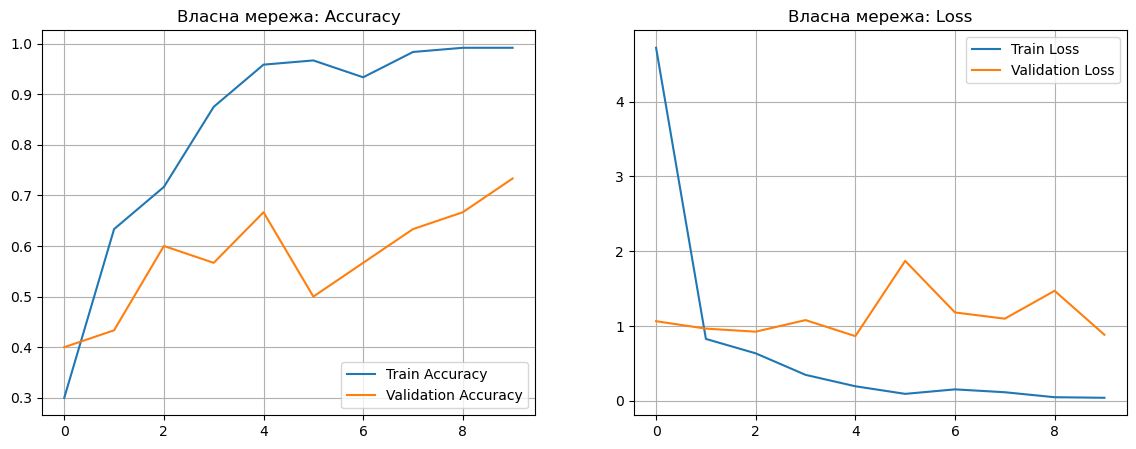

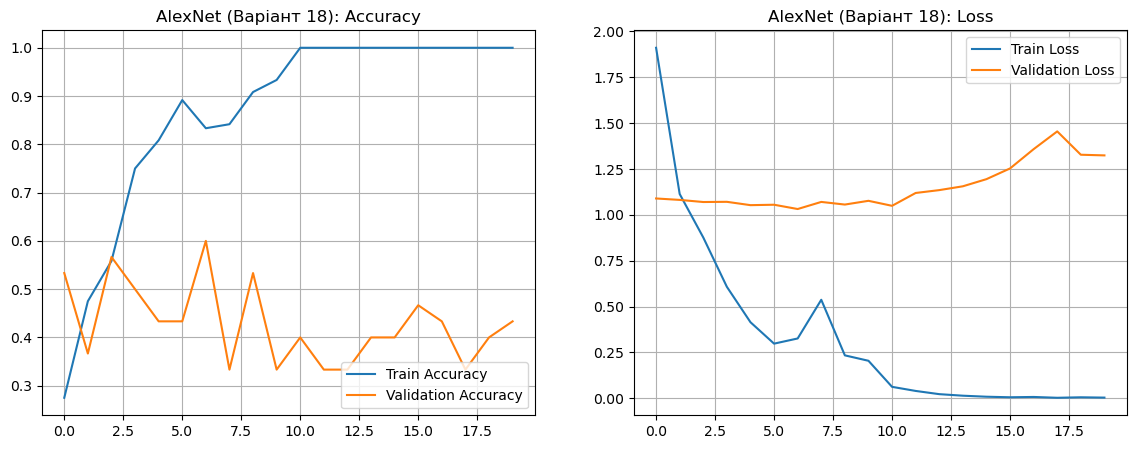

In [12]:
def plot_comparison(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))
    
    # Графік точності
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title(f'{title}: Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Графік втрат
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title(f'{title}: Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    
    plt.show()

print("Графіки навчання:")
plot_comparison(history_my, "Власна мережа")
plot_comparison(history_alexnet, "AlexNet (Варіант 18)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


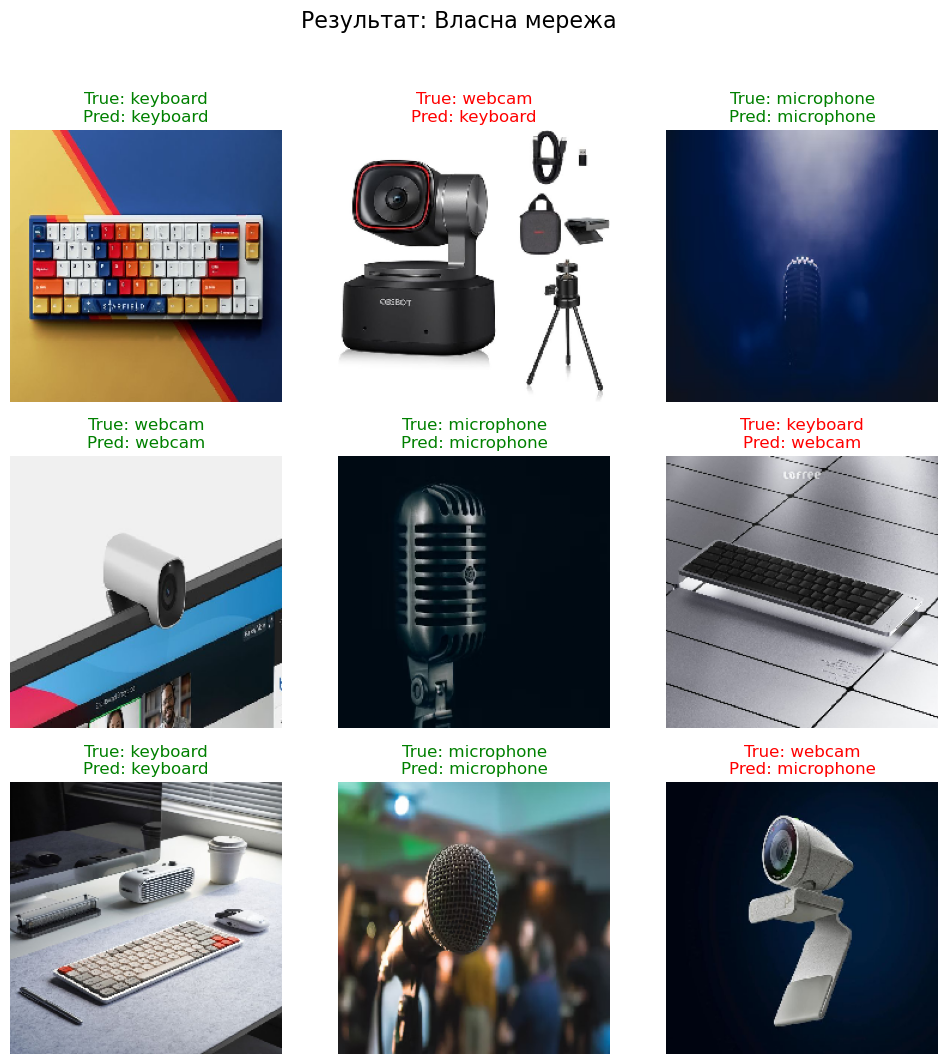

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


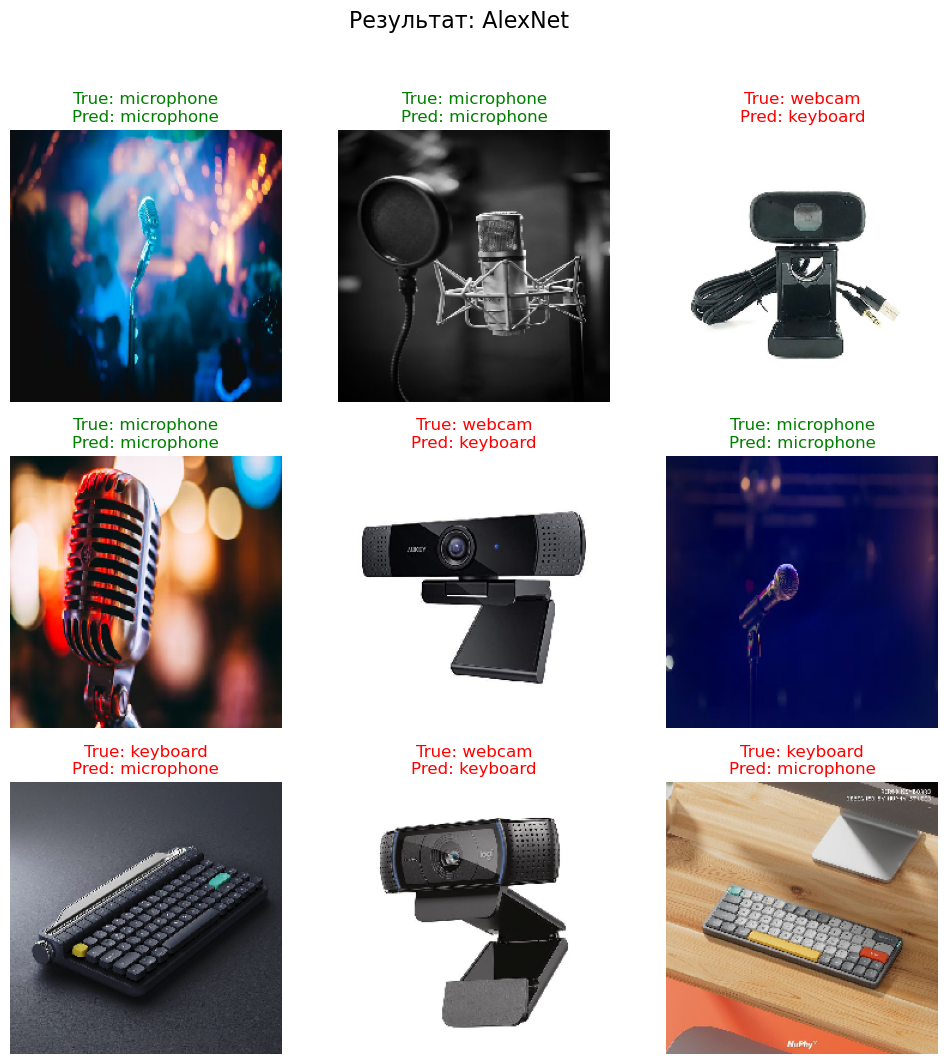

In [13]:
# Отримуємо імена класів
class_names = {v: k for k, v in train_ds.class_indices.items()}

def visualize_predictions(model, dataset, title):
    images, labels = next(dataset)
    predictions = model.predict(images)
    
    plt.figure(figsize=(12, 12))
    plt.suptitle(title, fontsize=16)
    
    for i in range(min(9, len(images))):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        true_idx = np.argmax(labels[i])
        pred_idx = np.argmax(predictions[i])
        
        color = 'green' if true_idx == pred_idx else 'red'
        
        plt.title(f"True: {class_names[true_idx]}\nPred: {class_names[pred_idx]}", color=color)
        plt.axis("off")
    plt.show()

visualize_predictions(my_model, val_ds, "Результат: Власна мережа")
visualize_predictions(alexnet_model, val_ds, "Результат: AlexNet")

In [14]:
def print_stats(model, name):
    loss, acc = model.evaluate(val_ds, verbose=0)
    print(f"Мережа: {name}")
    print(f" -> Точність: {acc*100:.2f}%")
    print(f" -> Втрати:   {loss:.4f}")
    print("-" * 30)

print("\n Підсумкові результати")
print_stats(my_model, "Власна мережа")
print_stats(alexnet_model, "AlexNet")


 Підсумкові результати
Мережа: Власна мережа
 -> Точність: 73.33%
 -> Втрати:   0.8837
------------------------------
Мережа: AlexNet
 -> Точність: 43.33%
 -> Втрати:   1.3240
------------------------------
